# This is a python program to read, analyze and generate a report on revenue of RMS TURF PARK.

Importing required Libraries

In [2]:
# For calculations
import math
import numpy as np
import scipy

# For working with calendars
import calendar
from datetime import datetime

# For operating system tasks
import os
import sys

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Initialize Tkinter root widget
Tk().withdraw()  # This hides the root window

# Open file dialog to select the CSV file
file_path = askopenfilename(filetypes=[("CSV files", "*.csv")])

# Check if a file was selected
if file_path:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    print("dataset imported.")
else:
    print("No file selected.")


dataset imported.


In [5]:
df_cleaned = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_cleaned = df_cleaned.drop(index=0)
df_cleaned.loc[:, 'NUMBER OF GAMES'] = df.loc[:, 'NUMBER OF GAMES'].fillna(0)
df_cleaned = df.fillna(0)

In [6]:
df_cleaned.loc[:, 'TOTAL'].sum()

172385.0

In [7]:
df_cleaned['NUMBER OF GAMES'] = df_cleaned['NUMBER OF GAMES'].fillna(0)
df_cleaned['NUMBER OF GAMES'] = pd.to_numeric(df_cleaned['NUMBER OF GAMES'], errors='coerce')
total_games = df_cleaned['NUMBER OF GAMES'].sum()
print(f"Total number of games: {total_games}")

Total number of games: 191.0


In [8]:
df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])

# Check if 'Day' column exists before adding it
if 'Day' in df_cleaned.columns:
    print("Column 'Day' already exists.")
else:
    # Add a new column for the day of the week
    df_cleaned.insert(1, 'Day', df_cleaned['DATE'].dt.day_name())
    print("Column 'Day' added successfully.")

Column 'Day' added successfully.


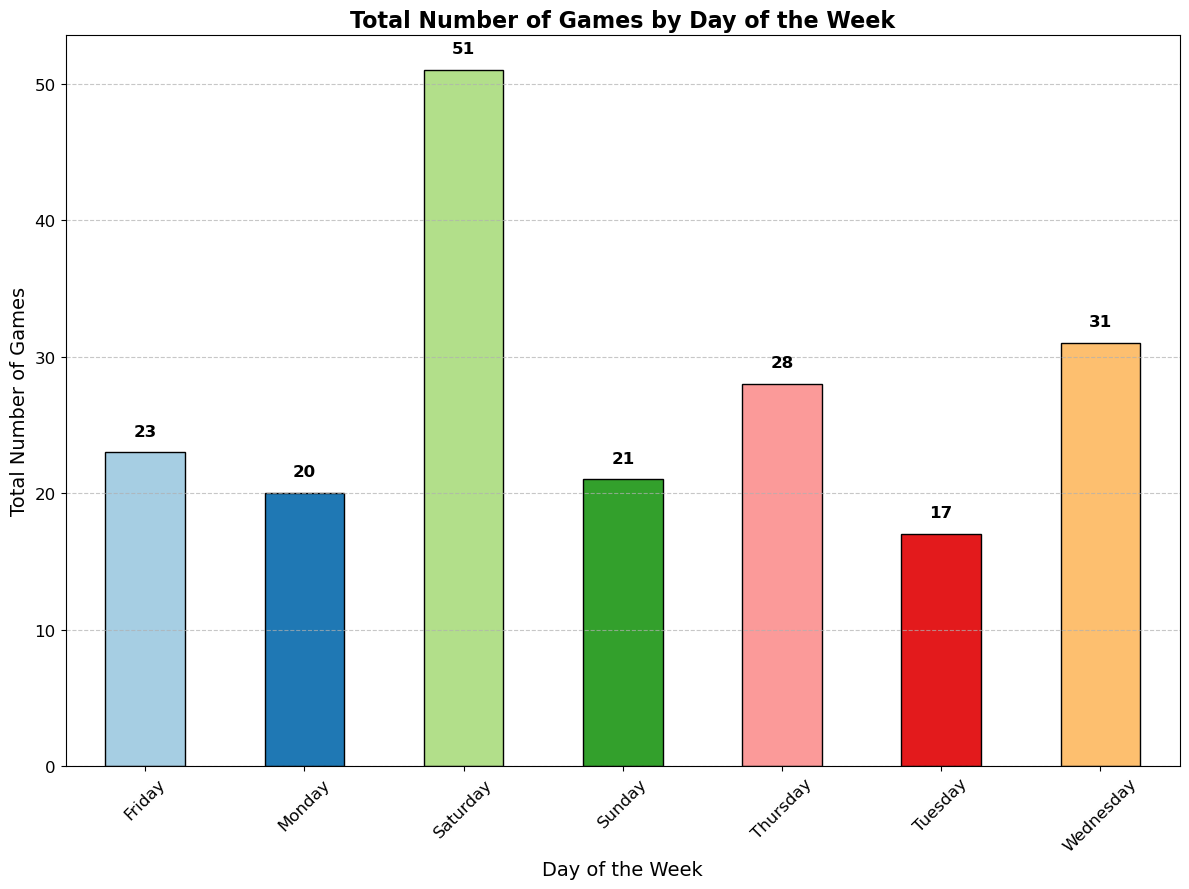

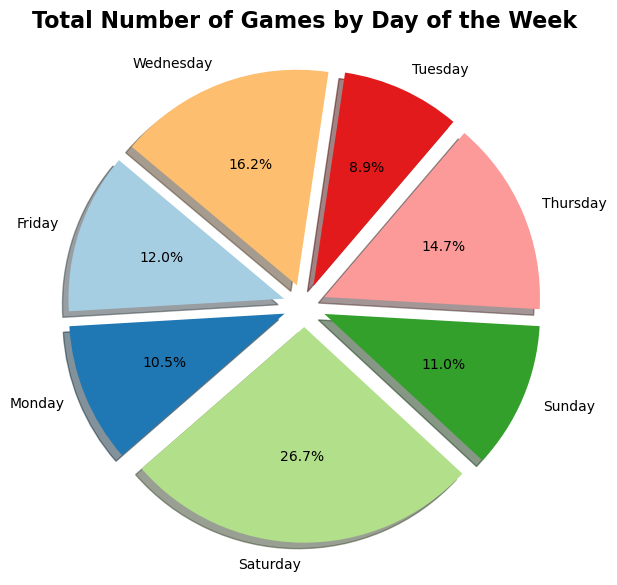

In [10]:
# Ensure 'NUMBER OF GAMES' is numeric
df_cleaned['NUMBER OF GAMES'] = pd.to_numeric(df_cleaned['NUMBER OF GAMES'], errors='coerce')

# Fill NaN values with 0
df_cleaned['NUMBER OF GAMES'] = df_cleaned['NUMBER OF GAMES'].fillna(0)

# Group by 'Day' and sum 'NUMBER OF GAMES'
day_summary = df_cleaned.groupby('Day')['NUMBER OF GAMES'].sum()

plt.figure(figsize=(12, 9))
bars = day_summary.plot(kind='bar', color=plt.cm.Paired(range(len(day_summary))), edgecolor='black')
plt.title('Total Number of Games by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Number of Games', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with the total count
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, int(height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# Group by 'Day' and sum 'NUMBER OF GAMES'
day_summary = df_cleaned.groupby('Day')['NUMBER OF GAMES'].sum()

plt.figure(figsize=(12, 7))
plt.pie(day_summary, labels=day_summary.index, autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.Paired(range(len(day_summary))), shadow=True, explode=[0.1]*len(day_summary))

# Add title
plt.title('Total Number of Games by Day of the Week', fontsize=16, fontweight='bold')

# Show plot
plt.show()

  Period Start Period End  Total Number of Games  Period Total
0   2024-03-16 2024-04-15                   32.0       36940.0
1   2024-04-16 2024-05-15                   24.0       21550.0
2   2024-05-16 2024-06-15                   32.0       26540.0
3   2024-06-16 2024-07-15                   27.0       24300.0
4   2024-07-16 2024-08-15                   61.0       49405.0
5   2024-08-16 2024-09-15                    0.0           0.0


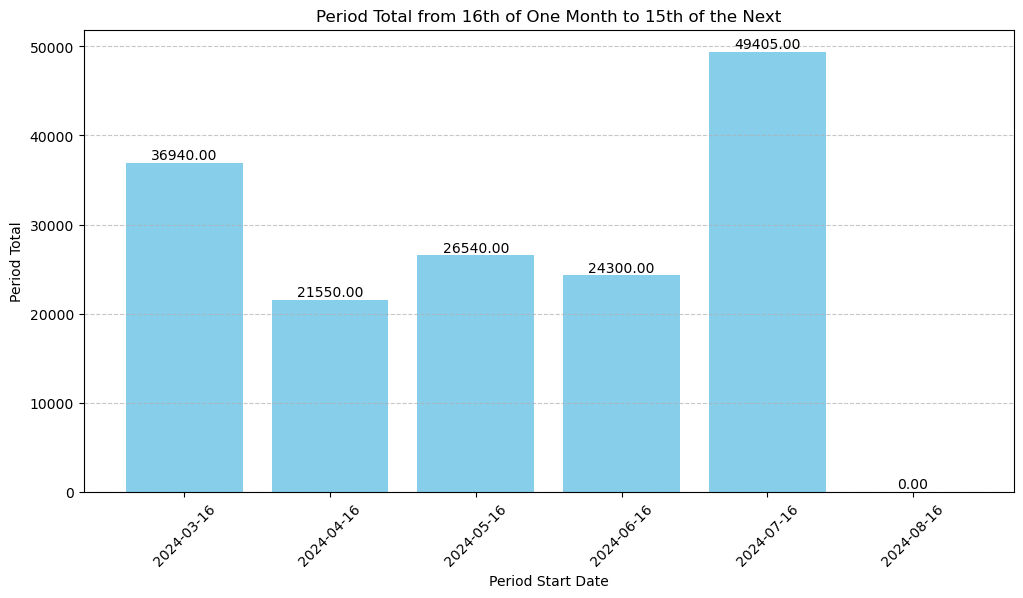

In [11]:

# Convert 'DATE' column to datetime
df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])

# Initialize the start date
start_date = pd.to_datetime('2024-03-16')

# Initialize a list to store results
month_results = []

# Initialize cumulative total
cumulative_total = 0

# Iterate over each period starting from the initial start_date
while start_date <= df_cleaned['DATE'].max():
    end_date = (start_date + pd.DateOffset(months=1)).replace(day=15)
    
    # Filter the DataFrame for the current period
    filtered_df = df_cleaned[(df_cleaned['DATE'] >= start_date) & (df_cleaned['DATE'] <= end_date)]
    
    # Calculate the total number of games
    total_games = filtered_df['NUMBER OF GAMES'].sum()
    
    # Calculate the total revenue for the current period
    period_total = filtered_df['TOTAL'].sum()
    
    
    # Append result to the list
    month_results.append({
        'Period Start': start_date,
        'Period End': end_date,
        'Total Number of Games': total_games,
        'Period Total': period_total,
       
    })
    
    # Move to the next period
    start_date = end_date + pd.DateOffset(days=1)

# Convert results to DataFrame for better display
month_results_df = pd.DataFrame(month_results)
print(month_results_df)


# Plot the period total
plt.figure(figsize=(12, 6))
plt.bar(month_results_df['Period Start'].astype(str), month_results_df['Period Total'], color='skyblue')
plt.title('Period Total from 16th of One Month to 15th of the Next')
plt.xlabel('Period Start Date')
plt.ylabel('Period Total')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the period total on top of each bar
for index, value in enumerate(month_results_df['Period Total']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Enter the month number (1-12): 8
Enter the year (e.g., 2024): 2024


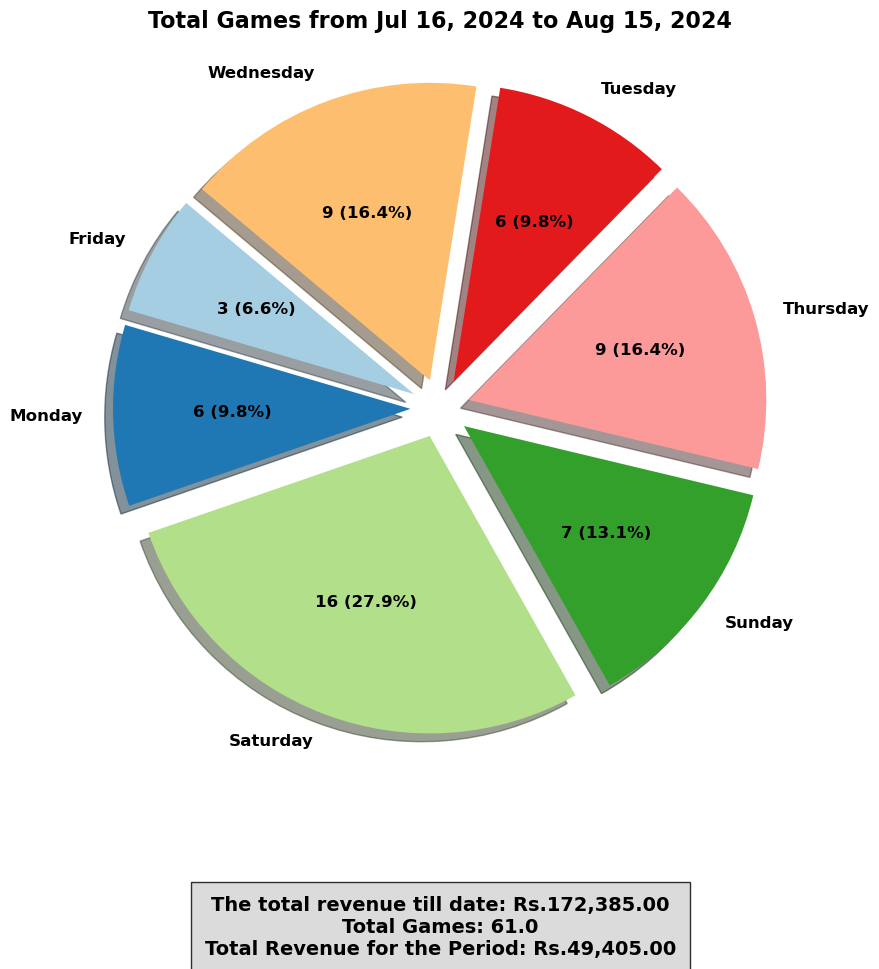

In [23]:

# Ask user for month and year
month = int(input("Enter the month number (1-12): "))
year = int(input("Enter the year (e.g., 2024): "))

# Validate month and year
if month < 1 or month > 12:
    print("Invalid month number. Please enter a number between 1 and 12.")
else:
    # Define start and end dates
    start_date = pd.Timestamp(year, month - 1, 16) if month > 1 else pd.Timestamp(year - 1, 12, 16)
    end_date = pd.Timestamp(year, month, 15)

    # Filter data
    filtered_df = df_cleaned[(df_cleaned['DATE'] >= start_date) & (df_cleaned['DATE'] <= end_date)]

    # Group by day of the week and sum total games
    games_per_day = filtered_df.groupby(filtered_df['Day'])['NUMBER OF GAMES'].sum()

    # Calculate total number of games
    total_games = games_per_day.sum()

    # Calculate total revenue for the time period
    total_revenue_period = filtered_df['TOTAL'].sum()

    # Calculate total revenue till date
    total_revenue_till_date = df_cleaned['TOTAL'].sum()

    # Function to format labels
    def func(pct, all_vals):
        absolute = int(pct / 100. * sum(all_vals))
        return f'{absolute} ({pct:.1f}%)'

    # Define colors and explode parameters
    colors = plt.cm.Paired(range(len(games_per_day)))
    explode = [0.1] * len(games_per_day)  # Explode all slices

    # Create a pie chart
    plt.figure(figsize=(12, 8))
    wedges, texts, autotexts = plt.pie(games_per_day, labels=games_per_day.index, autopct=lambda pct: func(pct, games_per_day), 
                                       startangle=140, colors=colors, explode=explode, shadow=True)

    # Improve font style for labels and percentages
    for text in texts:
        text.set_fontsize(12)
        text.set_fontweight('bold')
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')

    plt.title(f"Total Games from {start_date.strftime('%b %d, %Y')} to {end_date.strftime('%b %d, %Y')}", fontsize=16, fontweight='bold')

    # Add total games count and revenue in the pie chart
    plt.figtext(0.5, -0.2, f'The total revenue till date: Rs.{total_revenue_till_date:,.2f}\nTotal Games: {total_games}\nTotal Revenue for the Period: Rs.{total_revenue_period:,.2f}', 
                ha='center', fontsize=14, fontweight='bold',
                bbox={'facecolor': 'lightgrey', 'alpha': 0.8, 'pad': 10})

    plt.tight_layout()
    plt.show()

  
